# Lab | Imbalanced data

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# load dataset

data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# data cleaning
# first check the NA data in the dataset

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# check the value_counts for tenure, SeniorCitizen,MonthlyCharges and churn
data['tenure'].value_counts
data['SeniorCitizen'].value_counts
data['MonthlyCharges'].value_counts
data['Churn'].value_counts

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object>

In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# check the datatypes for dataframe
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data_reg = data[['tenure', 'SeniorCitizen', 'MonthlyCharges','Churn']]
data_reg

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [9]:
# change column names into lowercase
data_reg.columns = data_reg.columns.str.lower()

In [10]:

data_reg['churn'] = np.where(data_reg['churn'] == 'Yes', 1, 0)
data_reg


/var/folders/y4/rjh7l7d54692f4sprcn4svfh0000gn/T/ipykernel_91443/3009726562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['churn'] = np.where(data_reg['churn'] == 'Yes', 1, 0)


,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [11]:
data_reg['churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
data_reg

/var/folders/y4/rjh7l7d54692f4sprcn4svfh0000gn/T/ipykernel_91443/509462352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['churn'].replace({'No': 0, 'Yes': 1}, inplace=True)


,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [12]:
# X/y split
X = data_reg.drop('churn', axis = 1)
y = data_reg['churn']

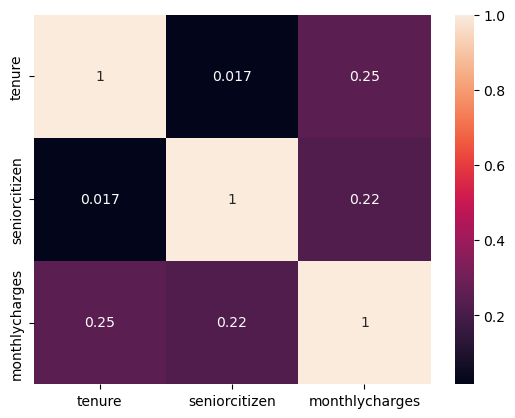

In [13]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# No colinearity found

## Standardization of independent variables

In [14]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
# SeniorCitzen should be categorical value instead of numberic value, but in the dataset there's only two types 
# under SeniorCitzen and they are correctly labeled, no need to one hot encoding.

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# Scaling data
transformer = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X_train.columns)
# because this is the only tranformation we apply to the numerics,
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X_test.columns)

In [16]:
X_train_scaled

,tenure,seniorcitizen,monthlycharges
0,0.333333,0.0,0.309263
1,0.750000,1.0,0.468127
2,0.041667,0.0,0.218127
3,0.847222,0.0,0.019920
4,0.166667,0.0,0.659363
...,...,...,...
5277,0.208333,0.0,0.848606
5278,0.138889,0.0,0.725598
5279,0.805556,0.0,0.024900
5280,0.013889,1.0,0.512948


In [17]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

pred = LR.predict(X_test_scaled)

In [18]:
# evaluate the model 

print(LR.score(X_test_scaled, y_test))
# given the dataset is unbalanced, 0.78 is not a very good score and recall score is particular low

0.7825099375354913


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6176470588235294
recall:  0.4535637149028078
f1:  0.5230386052303861


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1168,  130],
       [ 253,  210]])

In [21]:
print(y_test.value_counts())

0    1298
1     463
Name: churn, dtype: int64


In [22]:
# Even a simple model will give us more than 70% accuracy, because for churn column, 
# 'No' takes 1298/(1298+463) = 73.7%, the dataset is not balance, even you blindly choose No, will have 73.7% chance right

In [23]:
# Synthetic Minority Oversampling TEchnique (SMOTE) 
from imblearn.over_sampling import SMOTE

In [24]:
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [25]:
X_train_SMOTE.shape

(7752, 3)

In [26]:
print(LR.score(X_test_scaled, y_test))

0.7825099375354913


In [30]:
from sklearn.linear_model import LogisticRegression

LR_smote = LogisticRegression(random_state=0, solver='lbfgs')
LR_smote.fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = LR_smote.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

precision:  0.47982708933717577
recall:  0.7192224622030238
f1:  0.5756266205704408


In [31]:
confusion_matrix(y_test,pred_smote)

array([[937, 361],
       [130, 333]])

In [32]:
# Is it there any improvement?
# the accuary of the model didn't change much.the recall score changed significantly.